# 1 dataframe

dataframe是pandas最重要的类型，拥有丰富的方法和属性，下面就来看看。

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


输入df. 然后按tab可以看见可用的方法和属性，非常多，下面是一部分。   
df.A                  
df.abs                
df.add                  
df.add_prefix        
df.add_suffix        
df.align            
df.all               
df.any             
df.append             
df.apply            
df.applymap           
df.as_blocks        
df.asfreq      



In [2]:
df.shape

(4, 6)

In [3]:
df.head(2)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [4]:
df.tail(2)

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [5]:
df.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [7]:
df.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [8]:
df.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [9]:
df.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [10]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,test,foo


# 2 简单的实践

## 2.1 从 CSV 文件中读取数据

使用read_csv函数从CSV文件读取数据。 默认情况下，它假定字段以逗号分隔。

这个数据集是一个列表，蒙特利尔的 7 个不同的自行车道上每天有多少人。

首先要观察数据

In [11]:
df = pd.read_csv('data/bikes.csv')
df.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
3,04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
4,05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0


In [12]:
df.shape

(366, 11)

In [13]:
df.index

RangeIndex(start=0, stop=366, step=1)

In [14]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


修改index，可以更加轻松地进行观察

In [15]:
df.set_index('Date', inplace=True)
df.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


In [16]:
df['Berri1'].head()

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri1, dtype: int64

## 2.2 绘制图像

只需要在末尾添加.plot()，再容易不过了。  
我们可以看到，没有什么意外，一月、二月和三月没有什么人骑自行车。

In [17]:
df['Berri1'].plot(figsize=(20, 5))

我们也可以很容易地绘制所有的列。 我们会让它更大一点。 你可以看到它挤在一起，但所有的自行车道基本表现相同 - 如果对骑自行车的人来说是一个糟糕的一天，任意地方都是糟糕的一天。

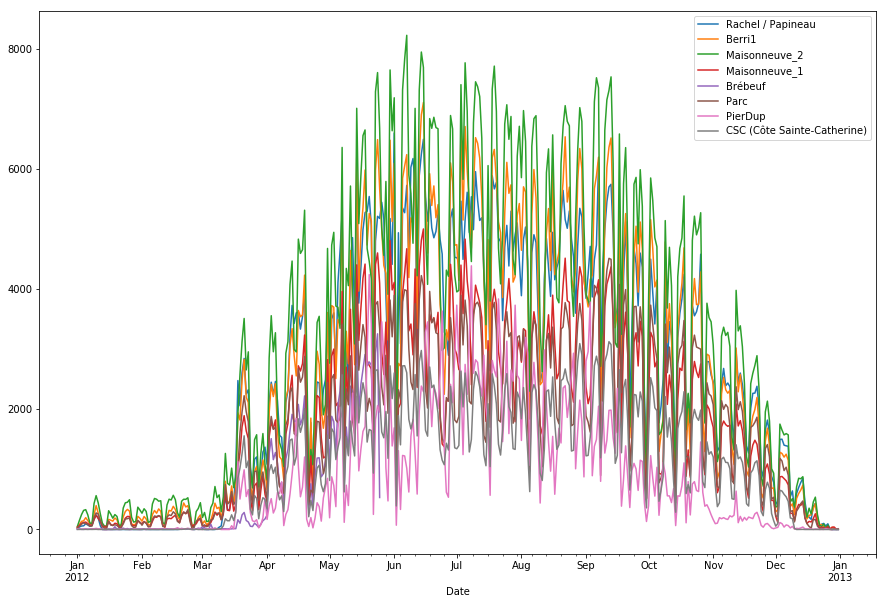

In [18]:
df.iloc[:, :-1].plot(figsize=(15, 10))

## 2.3 做一些分析

接下来，我们只是看看 Berri 自行车道。 Berri 是蒙特利尔的一条街道，是一个相当重要的自行车道。 现在我习惯走这条路去图书馆，但我在旧蒙特利尔工作时，我习惯于走这条路去上班。

所以我们要创建一个只有 Berri 自行车道的DataFrame。



In [19]:
berri_bikes = df[['Berri1']]
berri_bikes.head()

,Berri1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


接下来，我们需要添加一列weekday。 首先，我们可以从索引得到星期。 我们还没有谈到索引，但索引在上面的DataFrame中是左边的东西，在Date下面。 它基本上是一年中的所有日子。



In [20]:
berri_bikes.index


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

Pandas 有一堆非常棒的时间序列功能，所以如果我们想得到每一行的月份中的日期，我们可以这样做：

In [21]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=366)

我们实际上想要星期：



In [22]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=366)

这是周中的日期，其中 0 是星期一。我通过查询日历得到 0 是星期一。

现在我们知道了如何获取星期，我们可以将其添加到我们的DataFrame中作为一列：

In [23]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes.head()

d:\Users\i9233\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Berri1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


Dataframe有一个类似于 SQLgroupby的.groupby()方法，如果你熟悉的话。 我现在不打算解释更多 - 如果你想知道更多，请见文档。

在这种情况下，berri_bikes.groupby('weekday').aggregate(sum)意味着“按星期对行分组，然后将星期相同的所有值相加。

In [24]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri1
weekday,
0,142285
1,145795
2,163603
3,169976
4,150493
5,105635
6,102447


很难记住0, 1, 2, 3, 4, 5, 6是什么，所以让我们修复它并绘制出来：



In [25]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri1
Monday,142285
Tuesday,145795
Wednesday,163603
Thursday,169976
Friday,150493
Saturday,105635
Sunday,102447


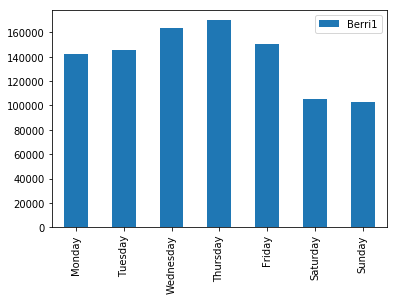

In [26]:
weekday_counts.plot(kind='bar')


所以看起来蒙特利尔是通勤骑自行车的人 - 他们在工作日骑自行车更多。
